In [3]:
import numpy as np
from scipy.optimize import fsolve

# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 7.5*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7.5*2.54,
    'lines.linewidth':2,
    'axes.linewidth': 1.0,  # default 1.25
    'legend.fontsize': 6*2.54,
    'xtick.labelsize': 7.5*2.54,
    'ytick.labelsize': 7.5*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)

# 图1 能带图和两种时间框架

In [4]:
# import qutip as qt
from matplotlib import cm
from matplotlib.collections import LineCollection
import random

In [260]:
def E(k, t1, t2):
    return np.arccos(np.cos(k)*np.cos(t1/2)*np.cos(t2/2)-np.sin(t1/2)*np.sin(t2/2))

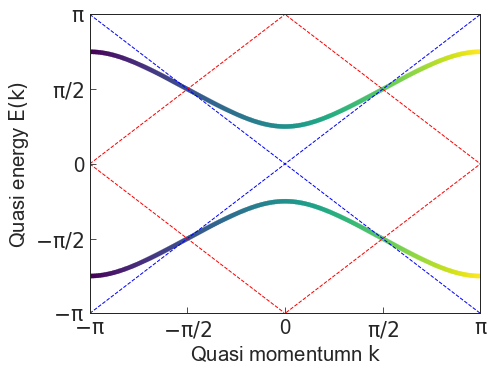

In [61]:
k = np.linspace(-np.pi, np.pi, 200)
t1 = np.pi/2
t2 = 0
norm = plt.Normalize(k.min(), k.max())
norm_x = norm(k)
plt.figure(figsize=(7,5.5))
plt.scatter(k, E(k, t1, t2), c=norm_x, cmap='viridis',s=20)
plt.scatter(k, -E(k, t1, t2), c=norm_x, cmap='viridis',s=20)
plt.plot(k,k,c='blue',lw=1,ls='--')
plt.plot(k,-k,c='blue',lw=1,ls='--')
plt.plot(k[0:100],np.pi+k[0:100],c='red',lw=1,ls='--')
plt.plot(k[0:100],-np.pi-k[0:100],c='red',lw=1,ls='--')
plt.plot(k[100:200],k[100:200]-np.pi,c='red',lw=1,ls='--')
plt.plot(k[100:200],np.pi+-k[100:200],c='red',lw=1,ls='--')
plt.xlabel(r'Quasi momentumn $\mathrm{k}$')
plt.ylabel(r'Quasi energy $\mathrm{E(k)}$')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],(r'$\mathrm{-\pi}$',r'$\mathrm{-\pi/2}$',r'0',r'$\mathrm{\pi/2}$',r'$\mathrm{\pi}$'))
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],(r'$\mathrm{-\pi}$',r'$\mathrm{-\pi/2}$',r'0',r'$\mathrm{\pi/2}$',r'$\mathrm{\pi}$'))
plt.savefig('../Figure/energy.pdf',bbox_inches = 'tight')



In [3]:
def ny(k,t1,t2):
    return (np.cos(k)*np.cos(t2/2)*np.sin(t1/2)+np.cos(t1/2)*np.sin(t2/2))/np.sin(E(k,t1,t2))

def nz(k,t1,t2):
    return -np.sin(k)*np.cos(t2/2)/np.sin(E(k,t1,t2))

def n(k,t1,t2):
    return [0,ny(k,t1,t2),nz(k,t1,t2)]


In [4]:
def Ny(k,t1,t2):
    return (np.cos(k)*np.cos(t1/2)*np.sin(t2/2)+np.cos(t2/2)*np.sin(t1/2))/np.sin(E(k,t1,t2))

def Nz(k,t1,t2):
    return -np.sin(k)*np.cos(t1/2)/np.sin(E(k,t1,t2))

def N(k,t1,t2):
    return [0,Ny(k,t1,t2),Nz(k,t1,t2)]


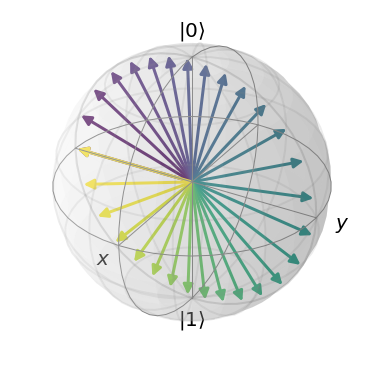

In [44]:
k_list = np.linspace(-np.pi, np.pi, 30)
nrm = mpl.colors.Normalize(-np.pi*0.9,np.pi*0.9)
colors = cm.viridis(nrm(k_list))
def Bloch_func(t1, t2):
    b = qt.Bloch()
    l0 = np.zeros(30)
    l1 = np.zeros(30)
    l2 = np.zeros(30)
    for k in k_list:
        b.add_vectors(n(k, t1, t2))
    b.vector_color = list(colors)
    b.frame_alpha = 0.15
    b.sphere_color = '#F7F7F7'
    b.size = [5,5]
    b.show()
    b.fig
Bloch_func(np.pi/2,0)
plt.savefig('../Figure/tf1.pdf',bbox_inches = 'tight')

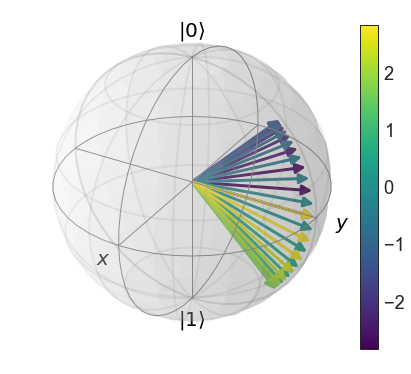

In [45]:
k_list = np.linspace(-np.pi, np.pi, 30)
nrm = mpl.colors.Normalize(-np.pi*0.9,np.pi*0.9)
colors = cm.viridis(nrm(k_list))
def Bloch_func(t1, t2):
    b = qt.Bloch()
    l0 = np.zeros(30)
    l1 = np.zeros(30)
    l2 = np.zeros(30)
    for k in k_list:
        b.add_vectors(N(k, t1, t2))
    b.vector_color = list(colors)
    b.frame_alpha = 0.15
    b.sphere_color = '#F7F7F7'
    b.size = [5,5]
    b.show()
    left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
    ax2 = b.fig.add_axes([left, bottom, width, height])
    mpl.colorbar.ColorbarBase(ax2, cmap=cm.viridis,
                                norm=nrm,
                                orientation='vertical')
    b.fig
Bloch_func(np.pi/2,0)
plt.savefig('../Figure/t21.pdf',bbox_inches = 'tight')

In [5]:
def carry_PHS(state, theta, chi):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2)-1j*np.sin(theta/2)*np.sin(chi), -np.sin(theta/2)*np.cos(chi)],[np.sin(theta/2)*np.cos(chi), np.cos(theta/2)+1j*np.sin(theta/2)*np.sin(chi)]])
	final_state = np.dot(U, state)

	return final_state    

def carry(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)

	return state[0], state[1]

def operator(up_state, down_state, theta, chi):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = carry_PHS(state, theta, chi)

	return state[0], state[1]

def one_step_1(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T2R2T1R1
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state


# def One_step_1(state, theta_1, theta_2):
# 	'''
# 	one step of complete quantum walk
# 	may with the help of auxiliary level
# 	input state of three level
# 	output state of three level
# 	T1:up-->right
# 	t2:down-->left 
# 	T2R2T1R1
# 	'''
# 	up_state = state[0]
# 	down_state = state[1]
# 	aux_state = state[2]
# 	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
# 	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
# 	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
# 	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
# 	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
# 	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
# 	up_state[0] = - up_state[0]
# 	state = np.vstack((up_state, down_state, aux_state))
# 	return state

def one_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def One_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state[0] = - up_state[0]
	state = np.vstack((up_state, down_state, aux_state))
	return state



def One_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state[0] = - up_state[0]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step(state, theta_1, theta_2, chi):
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = operator(up_state, down_state, theta_2, chi)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = operator(aux_state, down_state, theta_1, chi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state[0] = up_state[0]
	state = np.vstack((up_state, down_state, aux_state))
	return state
	
	state = np.vstack((up_state, down_state, aux_state))
	return state


def N_step_1(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_1(state, theta_1, theta_2)
	return state

def n_step_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2(state, theta_1, theta_2)
	return state

def N_step_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_2(state, theta_1, theta_2)
	return state

def n_step(state, theta_1, theta_2, chi, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step(state, theta_1, theta_2, chi)
	return state


# def N_step_3(state, theta_1, theta_2, N):
# 	'''
# 	N step of complete quantum walk
# 	'''
# 	for i in range(N):
# 		state = one_step_3(state, theta_1, theta_2)
# 	return state

def N_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_4(state, theta_1, theta_2)
	return state

def N_STEP_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_2(state, theta_1, theta_2)
	return state

def n_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_4(state, theta_1, theta_2)
	return state

def N_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_4(state, theta_1, theta_2)
	return state


In [22]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = n_step_2(init_state, theta, theta_1, N=50)
    state2 = N_step_2(init_state, theta, theta_1, N=50)
    P1 = abs(state1[0])**2 + abs(state1[1])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2
    p1[i] = P1[0] + P1[1] 
    p2[i] = P2[0] + P2[1]

In [27]:
M = 1000
n = 1
N = 500
p3 = np.zeros(801)
p4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state3 = n_step_2(init_state, theta_1, theta, N=50)
    state4 = N_step_2(init_state, theta_1, theta, N=50)
    P3 = abs(state3[0])**2 + abs(state3[1])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2
    p3[i] = P3[0] + P3[1] 
    p4[i] = P4[0] + P4[1] 

In [28]:
M = 1000
n = 1
N = 500
p5 = np.zeros(801)
p6 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state5 = n_step_4(init_state, theta, theta_1, N=50)
    state6 = N_step_4(init_state, theta, theta_1, N=50)
    P5 = abs(state5[0])**2 + abs(state5[1])**2
    P6 = abs(state6[0])**2 + abs(state6[1])**2
    p5[i] = P5[0] + P5[1] 
    p6[i] = P6[0] + P6[1] 
    

In [29]:
M = 1000
n = 1
N = 500
p7 = np.zeros(801)
p8 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state7 = n_step_4(init_state, theta_1, theta, N=50)
    state8 = N_step_4(init_state, theta_1, theta, N=50)
    P7 = abs(state7[0])**2 + abs(state7[1])**2
    P8 = abs(state8[0])**2 + abs(state8[1])**2
    p7[i] = P7[0] + P7[1] 
    p8[i] = P8[0] + P8[1] 

Text(0.5, 0, '$\\mathrm{\\theta}$')

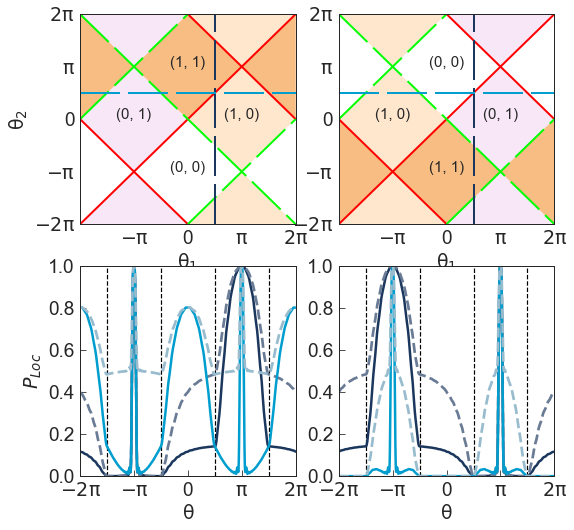

In [30]:
plt.figure(figsize=(8.5,8.5))
plt.subplot(2,2,1)
plt.xlim((-2*np.pi, 2*np.pi))
plt.xticks([2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.ylim((-2*np.pi, 2*np.pi))
plt.yticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))

plt.xlabel(r'$\mathrm{\theta_1}$')
plt.ylabel(r'$\mathrm{\theta_2}$')

T1 = np.linspace(-2*np.pi, 2*np.pi, 100)
T2 = np.linspace(0, 2*np.pi, 50)
T3 = np.linspace(-2*np.pi, 0, 50)
y1 = T3

y2 = -T2+2*np.pi
y3 = -T3-2*np.pi
plt.plot(T1, T1, c='r', linewidth=2)
plt.plot(T2, -T2+2*np.pi, c='r', linewidth=2)
plt.plot(T3, -T3-2*np.pi, c='r', linewidth=2)
y4 = -T3
y5 = T2-2*np.pi
y6 = T3+2*np.pi
line_1, = plt.plot(T1, -T1, c='#00FF00', linewidth=2, linestyle="-")
line_1.set_dashes((20,4))
line_2, = plt.plot(T2, T2-2*np.pi, c='#00FF00', linewidth=2, linestyle="-")
line_2.set_dashes((20,4))
line_3, = plt.plot(T3, T3+2*np.pi, c='#00FF00', linewidth=2, linestyle="-")
line_3.set_dashes((20,4))
line_4, = plt.plot(np.pi*np.ones(100)/2, T1, c='#1B375E', linewidth=2, linestyle="-")
line_4.set_dashes((20,4))
line_5, = plt.plot(T1, np.pi*np.ones(100)/2, c='#009ECF', linewidth=2, linestyle="-")
line_5.set_dashes((20,4))


plt.fill([-np.pi, 0, -2*np.pi], [np.pi, 2*np.pi, 2*np.pi], color='#F7E7F7')
plt.fill([-np.pi, -2*np.pi, -np.pi, 0], [np.pi, 0, -np.pi, 0], color='#F7E7F7')
plt.fill([-np.pi, -2*np.pi, 0], [-np.pi, -2*np.pi, -2*np.pi], color='#F7E7F7')

plt.fill([np.pi, 0, 2*np.pi], [np.pi, 2*np.pi, 2*np.pi], color='#FFE7CE')
plt.fill([np.pi, 2*np.pi, np.pi, 0], [np.pi, 0, -np.pi, 0], color='#FFE7CE')
plt.fill([np.pi, 2*np.pi, 0], [-np.pi, -2*np.pi, -2*np.pi], color='#FFE7CE')

plt.fill([-np.pi, -2*np.pi, -2*np.pi], [np.pi, 2*np.pi, 0], color='#F8BD82')
plt.fill([-np.pi, 0, np.pi, 0], [np.pi, 0, np.pi, 2*np.pi], color='#F8BD82')
plt.fill([np.pi, 2*np.pi, 2*np.pi], [np.pi, 2*np.pi, 0], color='#F8BD82')

plt.fill([-np.pi, -2*np.pi, -2*np.pi], [-np.pi, -2*np.pi, 0], c='w')
plt.fill([-np.pi, 0, np.pi, 0], [-np.pi, 0, -np.pi, -2*np.pi], c='w')
plt.fill([np.pi, 2*np.pi, 2*np.pi], [-np.pi, -2*np.pi, 0], c='w')


plt.text(0, np.pi, '(1, 1)', ha='center', fontsize=15)
plt.text(-np.pi, 0, '(0, 1)', ha='center', fontsize=15)
plt.text(np.pi, 0, '(1, 0)', ha='center', fontsize=15)
plt.text(0, -np.pi, '(0, 0)', ha='center', fontsize=15)

plt.subplot(2,2,2)
plt.xlim((-2*np.pi, 2*np.pi))
plt.xticks([2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.ylim((-2*np.pi, 2*np.pi))
plt.yticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))

plt.xlabel(r'$\mathrm{\theta_1}$')
# plt.ylabel(r'$\theta_2$')

T1 = np.linspace(-2*np.pi, 2*np.pi, 100)
T2 = np.linspace(0, 2*np.pi, 50)
T3 = np.linspace(-2*np.pi, 0, 50)
y1 = T3

y2 = -T2+2*np.pi
y3 = -T3-2*np.pi
plt.plot(T1, T1, c='r', linewidth=2)
plt.plot(T2, -T2+2*np.pi, c='r', linewidth=2)
plt.plot(T3, -T3-2*np.pi, c='r', linewidth=2)
y4 = -T3
y5 = T2-2*np.pi
y6 = T3+2*np.pi
line_1, = plt.plot(T1, -T1, c='#00FF00', linewidth=2, linestyle="-")
line_1.set_dashes((20,4))
line_2, = plt.plot(T2, T2-2*np.pi, c='#00FF00', linewidth=2, linestyle="-")
line_2.set_dashes((20,4))
line_3, = plt.plot(T3, T3+2*np.pi, c='#00FF00', linewidth=2, linestyle="-")
line_3.set_dashes((20,4))
line_4, = plt.plot(np.pi*np.ones(100)/2, T1, c='#1B375E', linewidth=2, linestyle="-")
line_4.set_dashes((20,4))
line_5, = plt.plot(T1, np.pi*np.ones(100)/2, c='#009ECF', linewidth=2, linestyle="-")
line_5.set_dashes((20,4))

plt.fill([-np.pi, 0, -2*np.pi], [np.pi, 2*np.pi, 2*np.pi], color='#FFE7CE')
plt.fill([-np.pi, -2*np.pi, -np.pi, 0], [np.pi, 0, -np.pi, 0], color='#FFE7CE')
plt.fill([-np.pi, -2*np.pi, 0], [-np.pi, -2*np.pi, -2*np.pi], color='#FFE7CE')


plt.fill([np.pi, 0, 2*np.pi], [np.pi, 2*np.pi, 2*np.pi], color='#F7E7F7')
plt.fill([np.pi, 2*np.pi, np.pi, 0], [np.pi, 0, -np.pi, 0], color='#F7E7F7')
plt.fill([np.pi, 2*np.pi, 0], [-np.pi, -2*np.pi, -2*np.pi], color='#F7E7F7') 


plt.fill([-np.pi, -2*np.pi, -2*np.pi], [np.pi, 2*np.pi, 0], color='w')
plt.fill([-np.pi, 0, np.pi, 0], [np.pi, 0, np.pi, 2*np.pi], color='w')
plt.fill([np.pi, 2*np.pi, 2*np.pi], [np.pi, 2*np.pi, 0], color='w')


plt.fill([-np.pi, -2*np.pi, -2*np.pi], [-np.pi, -2*np.pi, 0], c='#F8BD82')
plt.fill([-np.pi, 0, np.pi, 0], [-np.pi, 0, -np.pi, -2*np.pi], c='#F8BD82')
plt.fill([np.pi, 2*np.pi, 2*np.pi], [-np.pi, -2*np.pi, 0], c='#F8BD82')


plt.text(0, np.pi, '(0, 0)', ha='center', fontsize=15)
plt.text(-np.pi, 0, '(1, 0)', ha='center', fontsize=15)
plt.text(np.pi, 0, '(0, 1)', ha='center', fontsize=15)
plt.text(0, -np.pi, '(1, 1)', ha='center', fontsize=15)

plt.subplot(2,2,3)
plt.plot(theta_2, p1,linewidth=2.5, c='#1B375E')
plt.plot(theta_2, p5,linewidth=2.7, c='#697B95',linestyle="--")
plt.plot(theta_2, p3,linewidth=2.5, c='#009ECF')
plt.plot(theta_2, p7,linewidth=2.7, c='#98bcce',linestyle="--")
plt.ylim(top = 1,bottom = 0)
plt.xlim((-2*np.pi,2*np.pi))
my_x_ticks = np.arange(-2*np.pi,2*np.pi+np.pi,np.pi) 
plt.xticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.ylabel(r'$P_{Loc}$')
plt.xlabel(r'$\mathrm{\theta}$')
plt.subplot(2,2,4)
plt.plot(theta_2, p2,linewidth=2.5, c='#1B375E')
plt.plot(theta_2, p6,linewidth=2.7, c='#697B95',linestyle="--")
plt.plot(theta_2, p4,linewidth=2.5, c='#009ECF')
plt.plot(theta_2, p8,linewidth=2.7, c='#98bcce',linestyle="--")
plt.ylim(top = 1,bottom = 0)
plt.xlim((-2*np.pi,2*np.pi))
my_x_ticks = np.arange(-2*np.pi,2*np.pi+np.pi,np.pi) 
plt.xticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.xlabel(r'$\mathrm{\theta}$')
# plt.savefig('../Figure/fig_3.pdf')

In [17]:
M = 1000
n = 1
N = 500
p9 = np.zeros(801)
p10 = np.zeros(801)
p11 = np.zeros(801)
p12 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
theta_2 = np.linspace(-3*np.pi/2,-np.pi/2,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state9 = n_step_2(init_state, theta_1, theta, N=400)
    state10 = N_step_2(init_state, theta_1, theta, N=400)
    state11 = n_step_4(init_state, theta_1, theta, N=400)
    state12 = N_step_4(init_state, theta_1, theta, N=400)
    P9 = abs(state9[0])**2 + abs(state9[1])**2
    P10 = abs(state10[0])**2 + abs(state10[1])**2
    P11 = abs(state11[0])**2 + abs(state11[1])**2
    P12 = abs(state12[0])**2 + abs(state12[1])**2
    p9[i] = P9[0] + P9[1] 
    p10[i] = P10[0] + P10[1] 
    p11[i] = P11[0] + P11[1] 
    p12[i] = P12[0] + P12[1] 
    

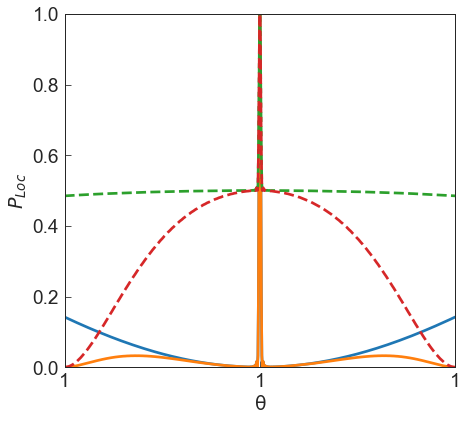

In [30]:
plt.figure(figsize=(7,6.5))
plt.plot(theta_2, p9,linewidth=2.7)
plt.plot(theta_2, p10,linewidth=2.7)
plt.plot(theta_2, p11,linewidth=2.7,linestyle="--")
plt.plot(theta_2, p12,linewidth=2.7,linestyle="--")
plt.ylabel(r'$P_{Loc}$')
plt.xlabel(r'$\mathrm{\theta}$')
plt.xlim(-3*np.pi/2,-np.pi/2)
plt.ylim(0,1)
plt.xticks([-3*np.pi/2,-np.pi,-np.pi/2],(1,1,1))
plt.savefig('../Figure/sup.pdf')

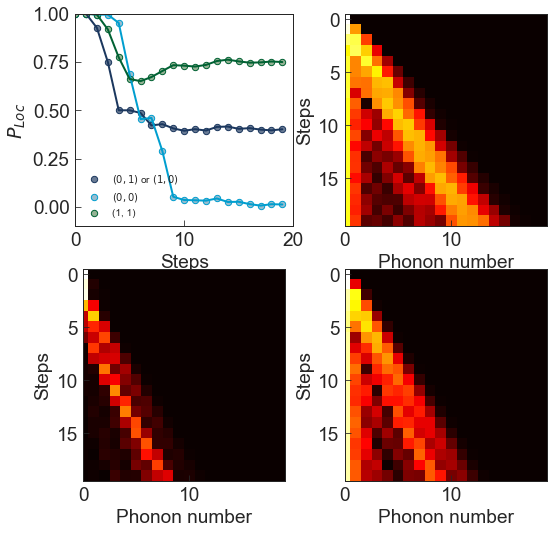

In [406]:
plt.figure(figsize=(8.6, 8.6))
M = 1000
n = 1
N = 500
loc1 = np.zeros(20)
loc2 = np.zeros(20)
loc3 = np.zeros(20)
heat1 = np.zeros((20,20))
heat2 = np.zeros((20,20))
heat3 = np.zeros((20,20))
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
# up_state[0] = 1/np.sqrt(2)
# down_state[0] = 1/np.sqrt(2)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i in range(20):
    state_1 = n_step_4(init_state, 0, np.pi/2, N=i)
    state_2 = n_step_4(init_state, -2*np.pi/3, np.pi/2, N=i)
    state_3 = n_step_4(init_state, 2*np.pi/3, np.pi/2, N=i)
    P_1 = abs(state_1[0])**2 + abs(state_1[1])**2 + abs(state_1[2])**2
    loc1[i] = P_1[0] + P_1[1]
    heat1[i] = P_1[0:20]
    P_2 = abs(state_2[0])**2 + abs(state_2[1])**2 + abs(state_2[2])**2
    loc2[i] = P_2[0] + P_2[1]
    heat2[i] = P_2[0:20]
    P_3 = abs(state_3[0])**2 + abs(state_3[1])**2 + abs(state_3[2])**2
    loc3[i] = P_3[0] + P_3[1]
    heat3[i] = P_3[0:20]
plt.subplot(2, 2, 1)
plt.xlim((0,20))
plt.ylim((-0.1,1))
plt.xlabel('Steps')
plt.ylabel(r'$P_{Loc}$')
plt.scatter(range(20),loc1,c='#697B95',edgecolors='#1B375E',label='$(0, 1)$'+' or '+'$(1, 0)$',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(range(20), loc1, c='#1B375E')
plt.scatter(range(20), loc2,c='#98bcce',edgecolors='#009ECF',label='$(0, 0)$',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(range(20), loc2, c='#009ECF')
plt.scatter(range(20), loc3,c='#95B294',edgecolors='#006133',label='(1, 1)',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(range(20), loc3, c='#006133')
plt.legend(loc='best',fontsize=10,frameon=False)
my_y_ticks = [0, 5, 10, 15]
plt.subplot(2, 2, 2)
plt.xlim(0, 19)
plt.yticks(my_y_ticks,(0,5,10,15))
plt.xlabel('Phonon number')
plt.ylabel('Steps')
plt.imshow(np.log(heat1/100+0.0001), cmap='hot', interpolation='nearest')
plt.subplot(2, 2, 3)
plt.xlim(0, 19)
plt.yticks(my_y_ticks,(0,5,10,15))
plt.xlabel('Phonon number')
plt.ylabel('Steps')
plt.imshow(heat2, cmap='hot', interpolation='nearest')
plt.subplot(2, 2, 4)
plt.xlim(0, 19)
plt.yticks(my_y_ticks,(0,5,10,15))
plt.xlabel('Phonon number')
plt.ylabel('Steps')
plt.imshow(np.log(heat3/100+0.0001), cmap='hot', interpolation='nearest')
# plt.savefig('../Figure/fig_4.pdf')

# supplement material

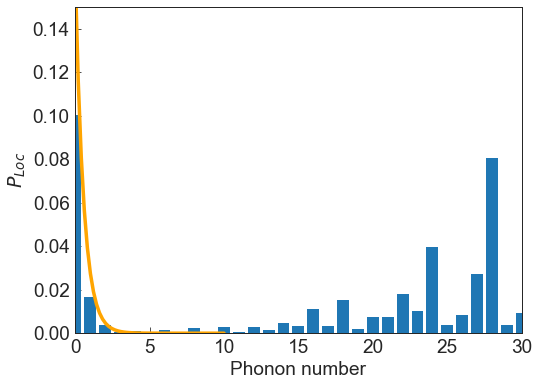

In [221]:
plt.figure(figsize=(8, 6))
x = np.linspace(0,10)
def f(x):
    return pow((np.sqrt(2)-1),x)**2*(1-(np.sqrt(2)-1)**2)/5
p = np.zeros(50)
for i in range(50):
    state = n_step_2(init_state, 0, np.pi/2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p[i] = P[i]
plt.xlim((0,30))
plt.ylim((0,0.15))
plt.bar(range(50),p)
plt.xlabel('Phonon number')
plt.ylabel(r'$P_{Loc}$')
plt.plot(x, f(x),color='orange',linewidth=3.5)
plt.savefig('../Figure/Bound1.pdf')

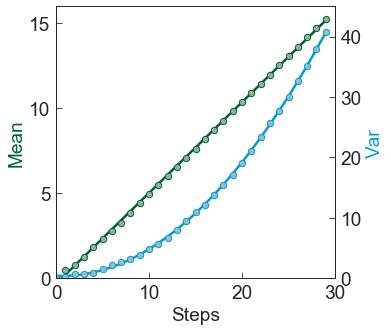

In [224]:
from scipy import optimize
 
def f_1(x, A, B):
    return A * x + B
def f_2(x, A, B, C):
    return A*x**2 +B*x + C

M = 1000
n = 1
N = 500
p1 = np.zeros(801)
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
fig = plt.figure(figsize=(5, 5))
mean = np.zeros(30)
var = np.zeros(30)
for i in range(30):
    state = n_step_2(init_state, 0, np.pi/2, N=i)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    mean[i] = 0
    for j in range(50):
        mean[i] = mean[i] + P[j]*j
        var[i] = var[i] + P[j]*j**2
    mean[i] = mean[i]
    var[i] =  var[i] - mean[i]**2

A1, B1 = optimize.curve_fit(f_1, range(30), mean)[0]
x1 = range(30)
y1 = A1 * x1 + B1
ax1 = fig.add_subplot(111)

ax1.plot(x1,y1, linewidth=2.5, zorder=1,c='#006133')
ax1.scatter(range(30), mean,zorder=2,c='#95B294',edgecolors='#006133',label='(1, 1)',linewidths=1, \
            marker = 'o', s = 40)
ax1.set_xlim((0,30))
ax1.set_ylim((0,16))
ax1.set_xlabel('Steps')
ax1.set_ylabel('Mean',c='#006133')
ax1.set_yticks(np.arange(0,16,5))
ax2 = ax1.twinx()
a=np.polyfit(x1, var, 2)#用2次多项式拟合x，y数组
b=np.poly1d(a)#拟合完之后用这个函数来生成多项式对象
c=b(x1)#生成多项式对象之后，就是获取x在这个多项式处的值
ax2.plot(x1, c, linewidth=2.5, zorder=1, c='#009ECF')
ax2.scatter(range(30), var,zorder=2,c='#98bcce',edgecolors='#009ECF',label='$(0, 0)$',linewidths=1, \
            marker = 'o', s = 40)
ax2.set_ylim((0,45))
ax2.set_ylabel('Var',c='#009ECF')

plt.savefig('../Figure/Bound2.pdf')

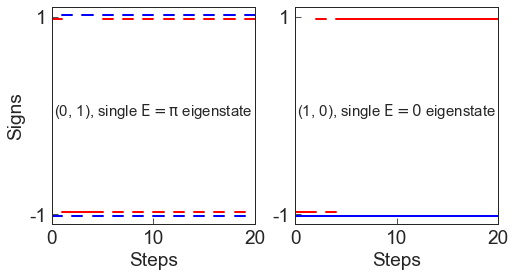

In [266]:
theta_1 = np.pi/4
theta_2 = np.pi/2
a=np.zeros((31,4))
for i in range(31): 
    if (i == 0):
        sstate1 = one_step_2(init_state, theta_1, theta_2)
        sstate2 = one_step_2(init_state, theta_1, -theta_2)
    else:
        sstate1 = one_step_2(sstate1, theta_1, theta_2)
        sstate2 = one_step_2(sstate2, theta_1, -theta_2)
    a[i] = np.sign([sstate1[0][0], sstate1[1][0],sstate2[0][0], sstate2[1][0]])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('Steps')
plt.ylabel('Signs')
plt.text(10, 0, '(0, 1), single '+r'$\mathrm{E=\pi}$'+' eigenstate', ha='center', fontsize=15)
plt.yticks([-1, 1], (-1, 1))
plt.ylim((-1.1,1.1))
plt.xlim((0,20))
for i in range(20):
    T = np.linspace(i,i+1,10)
    plt.plot(T,a.T[0][i]*np.ones(10)*1.02,c='b')
for i in range(20):
    T = np.linspace(i,i+1,10)
    plt.plot(T,a.T[1][i]*np.ones(10)*0.98,c='r')
plt.subplot(1,2,2)
plt.yticks([-1, 1], (-1, 1))
plt.xlabel('Steps')
plt.text(10, 0, '(1, 0), single '+ r'$\mathrm{E=0}$'+' eigenstate', ha='center', fontsize=15)
plt.ylim((-1.1,1.1))
plt.xlim((0,20))
for i in range(20):
    T = np.linspace(i,i+1,10)
    plt.plot(T,a.T[2][i]*np.ones(10)*1.02,c='b')
for i in range(20):
    T = np.linspace(i,i+1,10)
    plt.plot(T,a.T[3][i]*np.ones(10)*0.98,c='r')
plt.savefig('../Figure/sup_2.pdf')

In [394]:
def neighbour(theta_1, theta_2, theta_3, init_state):
    p_1 = np.zeros(M+1)
    p_2 = np.zeros(M+1)
    p_3 = np.zeros(M+1)
    p_4 = np.zeros(M+1)
    p_5 = np.zeros(M+1)
    p_1[0]=1
    p_2[0]=1
    p_3[0]=1
    p_4[0]=1
    p_5[0]=1
    for i in range(n1): 
        if (i == 0):
            state1 = one_step_4(init_state, theta_1, theta_2)
            state2 = one_step_4(init_state, theta_1, theta_2)
            state3 = one_step_4(init_state, theta_1, theta_2)
            state4 = one_step_4(init_state, theta_1, theta_2)
            state5 = one_step_4(init_state, theta_1, theta_2)
        else:
            state1 = one_step_4(state1, theta_1, theta_2)
            state2 = one_step_4(state2, theta_1, theta_2) 
            state3 = one_step_4(state3, theta_1, theta_2) 
            state4 = one_step_4(state4, theta_1, theta_2)
            state5 = one_step_4(state5, theta_1, theta_2)
        P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
        p_1[i+1] = P1[0] + P1[1]
        P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
        p_2[i+1] = P1[0] + P1[1] 
        P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
        p_3[i+1] = P3[0] + P3[1] 
        P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
        p_4[i+1] = P4[0] + P4[1]
        P5 = abs(state5[0])**2 + abs(state5[1])**2 + abs(state5[2])**2
        p_5[i+1] = P5[0] + P5[1] 

    for i in range(n2+n3):
        t1 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_1))       
        state1 = one_step_4(state1, theta_1, t1)
        P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
        p_1[i+n1+1] = P1[0] + P1[1]
        t2 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_2))       
        state2 = one_step_4(state2, theta_1, t2)
        P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
        p_2[i+n1+1] = P2[0] + P2[1]
        t3 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_3))       
        state3 = one_step_4(state3, theta_1, t3)
        P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
        p_3[i+n1+1] = P3[0] + P3[1]
        t4 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_4))       
        state4 = one_step_4(state4, theta_1, t4)
        P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
        p_4[i+n1+1] = P4[0] + P4[1]
        state5 = one_step_4(state5, theta_1, theta_3)
        P5 = abs(state5[0])**2 + abs(state5[1])**2 + abs(state5[2])**2
        p_5[i+n1+1] = P5[0] + P5[1]
        
    return p_1,p_2,p_3,p_4,p_5

def Neighbour(theta_1, theta_2, theta_3, init_state):
    p_1 = np.zeros(M+1)
    p_2 = np.zeros(M+1)
    p_3 = np.zeros(M+1)
    p_4 = np.zeros(M+1)
    p_5 = np.zeros(M+1)
    p_1[0]=1
    p_2[0]=1
    p_3[0]=1
    p_4[0]=1
    p_5[0]=1
    for i in range(n1): 
        if (i == 0):
            state1 = one_step_4(init_state, theta_1, theta_2)
            state2 = one_step_4(init_state, theta_1, theta_2)
            state3 = one_step_4(init_state, theta_1, theta_2)
            state4 = one_step_4(init_state, theta_1, theta_2)
            state5 = one_step_4(init_state, theta_1, theta_2)
        else:
            state1 = one_step_4(state1, theta_1, theta_2)
            state2 = one_step_4(state2, theta_1, theta_2) 
            state3 = one_step_4(state3, theta_1, theta_2) 
            state4 = one_step_4(state4, theta_1, theta_2)
            state5 = one_step_4(state5, theta_1, theta_2)
        P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
        p_1[i+1] = P1[0] + P1[1]
        P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
        p_2[i+1] = P1[0] + P1[1] 
        P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
        p_3[i+1] = P3[0] + P3[1] 
        P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
        p_4[i+1] = P4[0] + P4[1]
        P5 = abs(state5[0])**2 + abs(state5[1])**2 + abs(state5[2])**2
        p_5[i+1] = P5[0] + P5[1] 

    for i in range(n2):
        t1 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i-n2)/xi_1))       
        state1 = one_step_4(state1, t1, theta_2)
        P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
        p_1[i+n1+1] = P1[0] + P1[1]
        t2 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i-n2)/xi_2))       
        state2 = one_step_4(state2, t2, theta_2)
        P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
        p_2[i+n1+1] = P2[0] + P2[1]
        t3 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i-n2)/xi_3))       
        state3 = one_step_4(state3, t3, theta_2)
        P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
        p_3[i+n1+1] = P3[0] + P3[1]
        t4 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i-n2)/xi_4))       
        state4 = one_step_4(state4, t4, theta_2)
        P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
        p_4[i+n1+1] = P4[0] + P4[1]
    
    for i in range(n3):
        t1 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i+1)/xi_1))     
        state1 = one_step_4(state1, t1, theta_2)   
        P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
        p_1[i+n1+n2+1] = P1[0] + P1[1]  
        t2 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i+1)/xi_2))     
        state2 = one_step_4(state2, t2, theta_2)   
        P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
        p_2[i+n1+n2+1] = P2[0] + P2[1]
        t3 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i+1)/xi_3))     
        state3 = one_step_4(state3, t3, theta_2)   
        P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
        p_3[i+n1+n2+1] = P3[0] + P3[1]
        t4 = 1/2 * (theta_3+theta_1 + (theta_3-theta_1) * np.tanh((i+1)/xi_4))     
        state4 = one_step_4(state4, t4, theta_2)   
        P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
        p_4[i+n1+n2+1] = P4[0] + P4[1]
    for i in range(n2+n3):
        state5 = one_step_4(state5, theta_3, theta_2)
        P5 = abs(state5[0])**2 + abs(state5[1])**2 + abs(state5[2])**2
        p_5[i+n1+1] = P5[0] + P5[1]
        return p_1,p_2,p_3,p_4,p_5

def f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p, dis):
    for i in range(n1): 
        if (i == 0):
            state = one_step_4(init_state, theta_1, theta_2)
        else:
            state = one_step_4(state, theta_1, theta_2)
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+1] = P[0] + P[1]
    for i in range(n2):
        t = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi)) 
#         t = theta_3
        state = one_step_4(state, theta_1, t+random.uniform(-dis,dis))
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+1] = P[0] + P[1]
    for i in range(n3):
        t = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi))
#         t = theta_3
        state = one_step_4(state, theta_1, t+random.uniform(-dis,dis))   
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+n2+1] = P[0] + P[1]
    for i in range(n4): 
        state = one_step_4(state, theta_1, theta_3)
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+n2+n3+1] = P[0] + P[1]
    return p

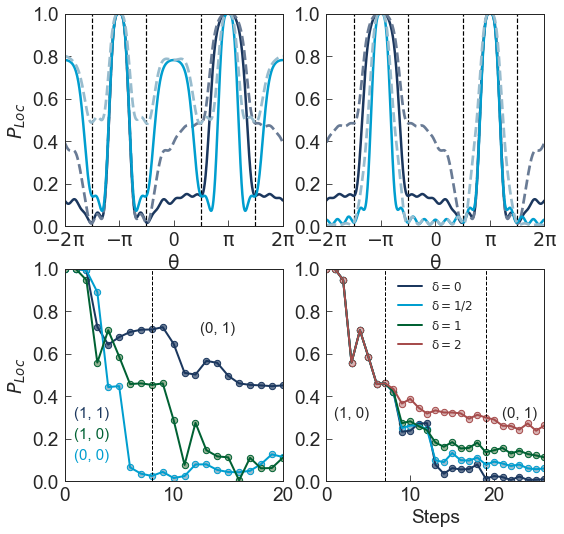

In [328]:
plt.figure(figsize=(8.6,8.6))
xi_1=1
xi_2=2
xi_3=4
xi_4=8
xi=8
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
plt.subplot(2,2,1)
plt.plot(theta_2, p1,linewidth=2.5, c='#1B375E')
plt.plot(theta_2, p5,linewidth=2.7, c='#697B95',linestyle="--")
plt.plot(theta_2, p3,linewidth=2.5, c='#009ECF')
plt.plot(theta_2, p7,linewidth=2.7, c='#98bcce',linestyle="--")
plt.ylim(top = 1,bottom = 0)
plt.xlim((-2*np.pi,2*np.pi))
my_x_ticks = np.arange(-2*np.pi,2*np.pi+np.pi,np.pi) 
plt.xticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.ylabel(r'$P_{Loc}$')
plt.xlabel(r'$\mathrm{\theta}$')
plt.subplot(2,2,2)
plt.plot(theta_2, p2,linewidth=2.5, c='#1B375E')
plt.plot(theta_2, p6,linewidth=2.7, c='#697B95',linestyle="--")
plt.plot(theta_2, p4,linewidth=2.5, c='#009ECF')
plt.plot(theta_2, p8,linewidth=2.7, c='#98bcce',linestyle="--")
plt.ylim(top = 1,bottom = 0)
plt.xlim((-2*np.pi,2*np.pi))
my_x_ticks = np.arange(-2*np.pi,2*np.pi+np.pi,np.pi) 
plt.xticks([-2*np.pi, 2*np.pi, -np.pi, np.pi, 0], ('$\mathrm{-2\pi}$', '$\mathrm{2\pi}$', '$\mathrm{-\pi}$', '$\mathrm{\pi}$', '0'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed",lw=1.2)
plt.xlabel(r'$\mathrm{\theta}$')

plt.subplot(2,2,3)

n1 = 8
n2 = 12
n3 = 0
theta_3 = 3*np.pi/4
theta_1 = np.pi/2
theta_2 = np.pi/4
p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]

theta_3 = 3*np.pi/4
theta_1 = -np.pi/2
theta_2 = np.pi/4
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]

theta_3 = np.pi/2
theta_1 = np.pi/4
theta_2 = -np.pi/2
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]

T = range(n1+n2+n3+1)
plt.plot(T, p_1, c='#1B375E', lw=2)
plt.scatter(range(21), p_1 ,c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(T, p_2, c='#009ECF', lw=2)
plt.scatter(range(21), p_2,c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(T, p_3, c='#006133', lw=2)
plt.scatter(range(21), p_3,c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.text(2.5, 0.3, '(1, 1)', ha='center',fontsize=15,c='#1B375E')
plt.text(14, 0.7, '(0, 1)', ha='center',fontsize=15)
plt.text(2.5, 0.1, '(0, 0)', ha='center',fontsize=15,c='#009ECF')
plt.text(2.5, 0.2, '(1, 0)', ha='center',fontsize=15,c='#006133')
plt.ylabel(r'$P_{Loc}$')

plt.subplot(2,2,4)
n1=7
n2=6
n3=6
n4=7
T = range(n1+n2+n3+n4+1)
n=50
dis=1
pp_1 = np.zeros(n1+n2+n3+n4+1)
pp_2 = np.zeros(n1+n2+n3+n4+1)
pp_3 = np.zeros(n1+n2+n3+n4+1)
pp_4 = np.zeros(n1+n2+n3+n4+1)
pp1=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    pp1[i][0]=1
for i in range(n):
    pp_1 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, pp1[i], 0) + pp_1
    
pp2=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    pp2[i][0]=1
for i in range(n):
    pp_2 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, pp1[i], dis) + pp_2

pp3=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    pp3[i][0]=1
for i in range(n):
    pp_3 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, pp1[i], dis*2) + pp_3

pp4=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    pp4[i][0]=1
for i in range(n):
    pp_4 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, pp1[i], dis*4.5) + pp_4

plt.plot(T, pp_1/n,label=r'$\mathrm{\delta=0}$', c='#1B375E', lw=2)
plt.scatter(range(n1+n2+n3+n4+1), pp_1/n, c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(T, pp_2/n,label=r'$\mathrm{\delta=1/2}$', c='#009ECF', lw=2)
plt.scatter(range(n1+n2+n3+n4+1), pp_2/n, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(T, pp_3/n,label=r'$\mathrm{\delta=1}$', c='#006133', lw=2)
plt.scatter(range(n1+n2+n3+n4+1), pp_3/n, c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 40)
plt.plot(T, pp_4/n,label=r'$\mathrm{\delta=2}$', c='#a64c4c', lw=2)
plt.scatter(range(n1+n2+n3+n4+1), pp_4/n, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
            marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3+n4))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2+n3, 0, 1, linestyles = "dashed",lw=1)
plt.xlabel('Steps')

plt.text(3, 0.3, '(1, 0)', ha='center',fontsize=15)
plt.text(23, 0.3, '(0, 1)', ha='center',fontsize=15)
leg = plt.legend(frameon=False,loc='upper center',fontsize=12)
leg.get_frame().set_linewidth(0.0)
plt.savefig('../Figure/sup_3.pdf')


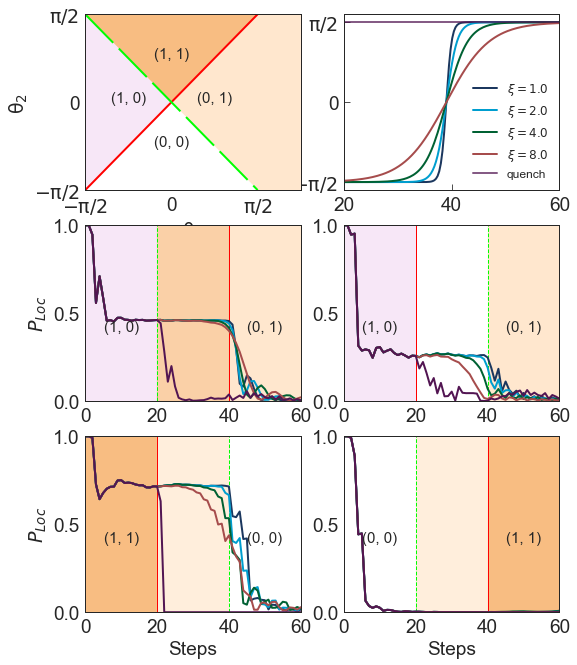

In [363]:
M = 200

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

n1 = 20
n2 = 20
n3 = 20
xi_1=1
xi_2=2
xi_3=4
xi_4=8

plt.figure(figsize=(8.5,11))
plt.subplot(3,2,2)
# 波形 ,theta_1 为后半段转角，theta_2 为前半段转角，xi越小演化越慢
theta_3 = np.pi/2
theta_1 = 0
theta_2 = -np.pi/2
def f(t, theta_1, theta_2, xi, n1):
    return 1/2*(theta_1+theta_2 + (theta_1-theta_2)*np.tanh((t-n1)/xi))
T = np.linspace(0,n1+n2+n3,200)
plt.xlim(n1,n1+n2+n3)
# plt.xlabel('Steps')
plt.ylabel(r'$\mathrm{\theta_1}$')
plt.yticks([-np.pi/2, np.pi/2, 0], ('$\mathrm{-\pi/2}$', '$\mathrm{\pi/2}$', '0'))
plt.plot(T,f(T, theta_3, theta_2, xi_1, n1+n2-1),label=r'$\xi=%.1f$'%(xi_1),c='#1B375E')
plt.plot(T,f(T, theta_3, theta_2, xi_2, n1+n2-1),label=r'$\xi=%.1f$'%(xi_2),c='#009ECF')
plt.plot(T,f(T, theta_3, theta_2, xi_3, n1+n2-1),label=r'$\xi=%.1f$'%(xi_3),c='#006133')
plt.plot(T,f(T, theta_3, theta_2, xi_4, n1+n2-1),label=r'$\xi=%.1f$'%(xi_4),c='#a64c4c')
plt.plot(T,theta_3*np.ones(200),alpha=0.7,label='quench',c='#521552')
leg = plt.legend(fontsize=12,frameon=False)
leg.get_frame().set_linewidth(0.0)

plt.subplot(3,2,1)
plt.xlim((-np.pi/2, 5*np.pi/4-np.pi/2))
plt.xticks([-np.pi/2, np.pi/2, 0], ('$\mathrm{-\pi/2}$', '$\mathrm{\pi/2}$', '0'))
plt.ylim((-np.pi/2, np.pi/2))
plt.yticks([-np.pi/2, np.pi/2, 0], ('$\mathrm{-\pi/2}$', '$\mathrm{\pi/2}$', '0'))
T4 = np.linspace(-np.pi/2, np.pi/2, 50)
plt.plot(T4, T4, c='r', linewidth=2)
line_6, = plt.plot(T4, -T4, c='#00FF00', linewidth=2, linestyle="-")
line_6.set_dashes((20,4))
plt.fill([0, -np.pi/2, np.pi/2], [0, np.pi/2, np.pi/2], color='#F8BD82')
plt.fill([0, np.pi/2, 3*np.pi/4, 3*np.pi/4, np.pi/2], [0, np.pi/2, np.pi/2, -np.pi/2, -np.pi/2], color='#FFE7CE')
plt.fill([0, np.pi/2, -2*np.pi], [0, -np.pi/2, -np.pi/2], color='w')
plt.fill([0, -np.pi/2, -np.pi/2], [0, np.pi/2, -np.pi/2], c='#F7E7F7')
plt.xlabel(r'$\mathrm{\theta_1}$')
plt.ylabel(r'$\mathrm{\theta_2}$')
plt.text(0, np.pi/4, '(1, 1)', ha='center', fontsize=15)
plt.text(-np.pi/4, 0, '(1, 0)', ha='center', fontsize=15)
plt.text(np.pi/4, 0, '(0, 1)', ha='center', fontsize=15)
plt.text(0, -np.pi/4, '(0, 0)', ha='center', fontsize=15)
A=[np.pi/4, np.pi/2]
B=[np.pi/4, -np.pi/2]

plt.subplot(3,2,3)
theta_3 = np.pi/2
theta_1 = np.pi/4
theta_2 = -np.pi/2

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.vlines(n1+n2, 0, 1,lw=1,color='r')
plt.text(10, 0.4, '(1, 0)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.yticks([0,0.5,1])
plt.ylabel(r'$P_{Loc}$')
plt.fill_between(np.linspace(0,20,20),1,0,color='#F7E7F7')
plt.fill_between(np.linspace(40,60,20),1,0,color='#FFE7CE')
plt.fill_between(np.linspace(20,40,20),1,0,color='#F8BD82',alpha=0.7)

plt.subplot(3,2,4)
theta_3 = np.pi/2
theta_1 = -np.pi/4
theta_2 = -np.pi/2

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1,lw=1,color='r')
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.text(10, 0.4, '(1, 0)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,20,20),1,0,color='#F7E7F7')
plt.fill_between(np.linspace(40,60,20),1,0,color='#FFE7CE')



plt.subplot(3,2,5)
theta_2 = np.pi/4
theta_1 = np.pi/2
theta_3 = -np.pi/2

p_1 =  Neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  Neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  Neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  Neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  Neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1,lw=1,color='r')
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.text(10, 0.4, '(1, 1)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 0)', ha='center', fontsize=15)
plt.ylabel(r'$P_{Loc}$')
plt.xlabel('Steps')
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,20,20),1,0,color='#F8BD82')
plt.fill_between(np.linspace(40,60,20),1,0,color='w')
plt.fill_between(np.linspace(20,40,20),1,0,color='#FFE7CE',alpha=0.7)

plt.subplot(3,2,6)
theta_2 = np.pi/4
theta_1 = -np.pi/2
theta_3 = np.pi/2

p_1 =  Neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  Neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  Neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  Neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  Neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.vlines(n1+n2, 0, 1,lw=1,color='r')
plt.text(10, 0.4, '(0, 0)', ha='center', fontsize=15)
plt.text(50, 0.4, '(1, 1)', ha='center', fontsize=15)
plt.xlabel('Steps')
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,20,20),1,0,color='w')
plt.fill_between(np.linspace(40,60,20),1,0,color='#F8BD82')
plt.fill_between(np.linspace(20,40,20),1,0,color='#FFE7CE',alpha=0.7)
plt.savefig('../Figure/fig_6.pdf')

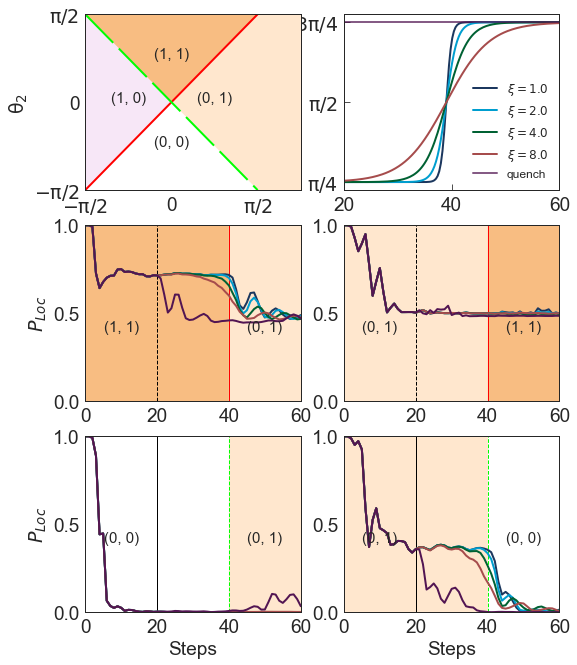

In [372]:

M = 200

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

n1 = 20
n2 = 20
n3 = 20
xi_1=1
xi_2=2
xi_3=4
xi_4=8

plt.figure(figsize=(8.5,11))
plt.subplot(3,2,2)
# 波形 ,theta_1 为后半段转角，theta_2 为前半段转角，xi越小演化越慢
theta_3 = 3*np.pi/4
theta_1 = np.pi/2
theta_2 = np.pi/4
def f(t, theta_1, theta_2, xi, n1):
    return 1/2*(theta_1+theta_2 + (theta_1-theta_2)*np.tanh((t-n1)/xi))
T = np.linspace(0,n1+n2+n3,200)
plt.xlim(n1,n1+n2+n3)
# plt.xlabel('Steps')
plt.ylabel(r'$\mathrm{\theta_1}$')
plt.yticks([np.pi/4, np.pi/2, 3*np.pi/4, 0], (r'$\mathrm{\pi/4}$', r'$\mathrm{\pi/2}$', r'$\mathrm{3\pi/4}$', '0'))
plt.plot(T,f(T, theta_3, theta_2, xi_1, n1+n2-1),label=r'$\xi=%.1f$'%(xi_1),c='#1B375E')
plt.plot(T,f(T, theta_3, theta_2, xi_2, n1+n2-1),label=r'$\xi=%.1f$'%(xi_2),c='#009ECF')
plt.plot(T,f(T, theta_3, theta_2, xi_3, n1+n2-1),label=r'$\xi=%.1f$'%(xi_3),c='#006133')
plt.plot(T,f(T, theta_3, theta_2, xi_4, n1+n2-1),label=r'$\xi=%.1f$'%(xi_4),c='#a64c4c')
plt.plot(T,theta_3*np.ones(200),alpha=0.7,label='quench',c='#521552')
leg = plt.legend(fontsize=12,frameon=False)
leg.get_frame().set_linewidth(0.0)

plt.subplot(3,2,1)
plt.xlim((-np.pi/2, 5*np.pi/4-np.pi/2))
plt.xticks([-np.pi/2, np.pi/2, 0], ('$\mathrm{-\pi/2}$', '$\mathrm{\pi/2}$', '0'))
plt.ylim((-np.pi/2, np.pi/2))
plt.yticks([-np.pi/2, np.pi/2, 0], ('$\mathrm{-\pi/2}$', '$\mathrm{\pi/2}$', '0'))
T4 = np.linspace(-np.pi/2, np.pi/2, 50)
plt.plot(T4, T4, c='r', linewidth=2)
line_6, = plt.plot(T4, -T4, c='#00FF00', linewidth=2, linestyle="-")
line_6.set_dashes((20,4))
plt.fill([0, -np.pi/2, np.pi/2], [0, np.pi/2, np.pi/2], color='#F8BD82')
plt.fill([0, np.pi/2, 3*np.pi/4, 3*np.pi/4, np.pi/2], [0, np.pi/2, np.pi/2, -np.pi/2, -np.pi/2], color='#FFE7CE')
plt.fill([0, np.pi/2, -2*np.pi], [0, -np.pi/2, -np.pi/2], color='w')
plt.fill([0, -np.pi/2, -np.pi/2], [0, np.pi/2, -np.pi/2], c='#F7E7F7')
# plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\mathrm{\theta_2}$')
plt.text(0, np.pi/4, '(1, 1)', ha='center', fontsize=15)
plt.text(-np.pi/4, 0, '(1, 0)', ha='center', fontsize=15)
plt.text(np.pi/4, 0, '(0, 1)', ha='center', fontsize=15)
plt.text(0, -np.pi/4, '(0, 0)', ha='center', fontsize=15)
A=[np.pi/4, np.pi/2]
B=[np.pi/4, -np.pi/2]

plt.subplot(3,2,3)
theta_3 = 3*np.pi/4
theta_1 = np.pi/2
theta_2 = np.pi/4

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1,color='black')
plt.vlines(n1+n2, 0, 1,lw=1,color='r')
plt.text(10, 0.4, '(1, 1)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.yticks([0,0.5,1])
plt.ylabel(r'$P_{Loc}$')
plt.fill_between(np.linspace(0,40,20),1,0,color='#F8BD82')
plt.fill_between(np.linspace(40,60,20),1,0,color='#FFE7CE')

plt.subplot(3,2,4)
theta_3 = np.pi/4
theta_1 = np.pi/2
theta_2 = 3*np.pi/4+0.2

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1,color='black')
plt.vlines(n1+n2, 0, 1,lw=1,color='r')
plt.text(10, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.text(50, 0.4, '(1, 1)', ha='center', fontsize=15)
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,40,20),1,0,color='#FFE7CE')
plt.fill_between(np.linspace(40,60,20),1,0,color='#F8BD82')


plt.subplot(3,2,5)
theta_3 = 3*np.pi/4
theta_1 = -np.pi/2
theta_2 = np.pi/4

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1,lw=1,color='black')
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.text(10, 0.4, '(0, 0)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.ylabel(r'$P_{Loc}$')
plt.xlabel('Steps')
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,40,20),1,0,color='w')
plt.fill_between(np.linspace(40,60,20),1,0,color='#FFE7CE')

plt.subplot(3,2,6)
theta_3 = np.pi/4
theta_1 = -np.pi/2
theta_2 = 3*np.pi/4

p_1 =  neighbour(theta_1, theta_2, theta_3, init_state)[0][0:n1+n2+n3+1]
p_2 =  neighbour(theta_1, theta_2, theta_3, init_state)[1][0:n1+n2+n3+1]
p_3 =  neighbour(theta_1, theta_2, theta_3, init_state)[2][0:n1+n2+n3+1]
p_4 =  neighbour(theta_1, theta_2, theta_3, init_state)[3][0:n1+n2+n3+1]
p_5 =  neighbour(theta_1, theta_2, theta_3, init_state)[4][0:n1+n2+n3+1]
T = range(n1+n2+n3+1)
plt.plot(T, p_1,lw=2,c='#1B375E')
# plt.scatter(T, p_1, c='#697B95',edgecolors='#1B375E',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_2,lw=2,c='#009ECF')
# plt.scatter(T, p_2, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_3,lw=2,c='#006133')
# plt.scatter(T, p_3, c='#95B294',edgecolors='#006133',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_4,lw=2,c='#a64c4c')
# plt.scatter(T, p_4, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
#             marker = 'o', s = 40)
plt.plot(T, p_5,lw=2,c='#521552')
# plt.scatter(T, p_5, c='#f0c4f0',edgecolors='#521552',linewidths=1, \
#             marker = 'o', s = 40)
plt.xlim((0,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1,lw=1,color='black')
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1,color='#00FF00')
plt.text(10, 0.4, '(0, 1)', ha='center', fontsize=15)
plt.text(50, 0.4, '(0, 0)', ha='center', fontsize=15)
plt.xlabel('Steps')
plt.yticks([0,0.5,1])
plt.fill_between(np.linspace(0,40,20),1,0,color='#FFE7CE')
plt.fill_between(np.linspace(40,60,20),1,0,color='w')
plt.savefig('../Figure/fig_5.pdf')

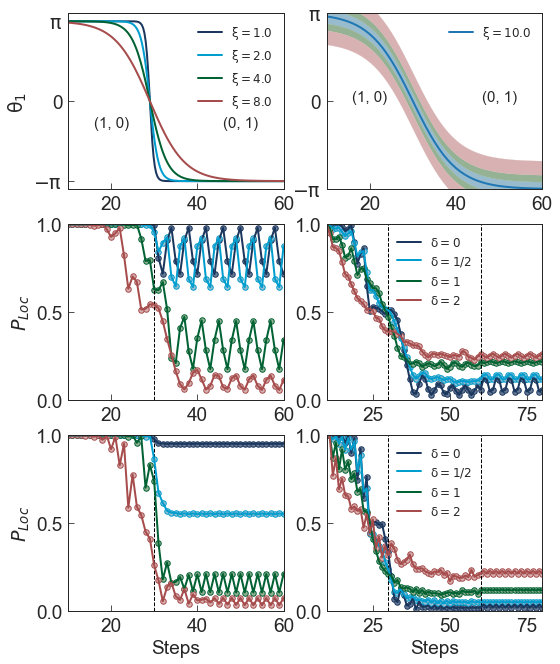

In [398]:
M = 200

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_3 = -np.pi
theta_1 = np.pi/2
theta_2 = np.pi

n1=10
n2=20
n3=30
n4=20
xi_1=1
xi_2=2
xi_3=4
xi_4=8

p_1 = np.zeros(M+1)
p_2 = np.zeros(M+1)
p_3 = np.zeros(M+1)
p_4 = np.zeros(M+1)
p_5 = np.zeros(M+1)
 
p_1[0]=1
p_2[0]=1
p_3[0]=1
p_4[0]=1
p_5[0]=1

plt.figure(figsize=(8.5,11))
plt.subplot(3,2,1)
# 波形 ,theta_1 为后半段转角，theta_2 为前半段转角，xi越小演化越慢
n = 30
def f(t, theta_1, theta_2, xi, n1):
    return 1/2*(theta_1+theta_2 + (theta_1-theta_2)*np.tanh((t-n1)/xi))
T = np.linspace(0,n1+n2+n3,n1+n2+n3+1)
T = np.linspace(0,n1+n2+n3,200)
plt.xlim(n1,n1+n2+n3)
plt.ylabel(r'$\mathrm{\theta_1}$')
plt.plot(T,f(T, theta_3, theta_2, xi_1, n1+n2-1),label=r'$\mathrm{\xi=%.1f}$'%(xi_1),c='#1B375E')
plt.plot(T,f(T, theta_3, theta_2, xi_2, n1+n2-1),label=r'$\mathrm{\xi=%.1f}$'%(xi_2),c='#009ECF')
plt.plot(T,f(T, theta_3, theta_2, xi_3, n1+n2-1),label=r'$\mathrm{\xi=%.1f}$'%(xi_3),c='#006133')
plt.plot(T,f(T, theta_3, theta_2, xi_4, n1+n2-1),label=r'$\mathrm{\xi=%.1f}$'%(xi_4),c='#a64c4c')
plt.yticks([-np.pi, np.pi, 0], (r'$\mathrm{-\pi}$', r'$\mathrm{\pi}$', '0'))
# plt.annotate('build steady-state', xy=(10, np.pi),xytext=(10, 2.5),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15,ha='center')
# plt.annotate('dynamical evolution', xy=(30, 0),xytext=(35, 0),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15,va='center')
plt.text(20, -1, '(1, 0)', ha='center', fontsize=15)
plt.text(50, -1, '(0, 1)', ha='center', fontsize=15)
leg = plt.legend(frameon=False,fontsize=12)
leg.get_frame().set_linewidth(0.0)

plt.subplot(3,2,3)

for i in range(n1): 
    if (i == 0):
        state1 = one_step_4(init_state, theta_1, theta_2)
        state2 = one_step_4(init_state, theta_1, theta_2)
        state3 = one_step_4(init_state, theta_1, theta_2)
        state4 = one_step_4(init_state, theta_1, theta_2)
    else:
        state1 = one_step_4(state1, theta_1, theta_2)
        state2 = one_step_4(state2, theta_1, theta_2) 
        state3 = one_step_4(state3, theta_1, theta_2) 
        state4 = one_step_4(state4, theta_1, theta_2) 
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+1] = P1[0] + P1[1]
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+1] = P1[0] + P1[1] 
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+1] = P3[0] + P3[1] 
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+1] = P4[0] + P4[1] 


for i in range(n2):
    t1 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_1))       
    state1 = one_step_4(state1, theta_1, t1)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+n1+1] = P1[0] + P1[1]
    t2 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_2))       
    state2 = one_step_4(state2, theta_1, t2)
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+n1+1] = P2[0] + P2[1]
    t3 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_3))       
    state3 = one_step_4(state3, theta_1, t3)
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+n1+1] = P3[0] + P3[1]
    t4 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_4))       
    state4 = one_step_4(state4, theta_1, t4)
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+n1+1] = P4[0] + P4[1]
    
for i in range(n3):
    t1 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_1))     
    state1 = one_step_4(state1, theta_1, t1)   
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+n1+n2+1] = P1[0] + P1[1]  
    t2 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_2))     
    state2 = one_step_4(state2, theta_1, t2)   
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+n1+n2+1] = P2[0] + P2[1]
    t3 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_3))     
    state3 = one_step_4(state3, theta_1, t3)   
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+n1+n2+1] = P3[0] + P3[1]
    t4 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_4))     
    state4 = one_step_4(state4, theta_1, t4)   
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+n1+n2+1] = P4[0] + P4[1]
    
T = range(n1+n2+n3+1)
plt.plot(T, p_1[0:n1+n2+n3+1],c='#1B375E')
plt.plot(T, p_2[0:n1+n2+n3+1],c='#009ECF')
plt.plot(T, p_3[0:n1+n2+n3+1],c='#006133')
plt.plot(T, p_4[0:n1+n2+n3+1],c='#a64c4c')
plt.scatter(T, p_1[0:n1+n2+n3+1], c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_2[0:n1+n2+n3+1], c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_3[0:n1+n2+n3+1], c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_4[0:n1+n2+n3+1], c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
            marker = 'o', s = 30)
plt.xlim((10,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1)
plt.ylabel(r'$P_{Loc}$')
plt.yticks([0,0.5,1])

import random
M = 200
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))



dis=1
xi=10
n=30



p_1 = np.zeros(n1+n2+n3+n4+1)
p_2 = np.zeros(n1+n2+n3+n4+1)
p_3 = np.zeros(n1+n2+n3+n4+1)
p_4 = np.zeros(n1+n2+n3+n4+1)


plt.subplot(3,2,2)
# 波形 ,theta_1 为后半段转角，theta_2 为前半段转角，xi越小演化越慢

def f(t, theta_1, theta_2, xi, n1):
    return 1/2*(theta_1+theta_2 + (theta_1-theta_2)*np.tanh((t-n1)/xi))
T = np.linspace(0,n1+n2+n3,n1+n2+n3+1)
th = np.zeros(n1+n2+n3+1)
th[0:n1] = theta_2*np.ones(n1)
for i,t in enumerate(T[n1-1:-1]):
    th[i+n1] = f(t, theta_3, theta_2, xi, n1+n2-1)
plt.xlim(10,60)
plt.ylim(-np.pi, np.pi)
plt.yticks([-np.pi, np.pi, 0], (r'$\mathrm{-\pi}$', r'$\mathrm{\pi}$', '0'))
plt.plot(T,th,label=r'$\mathrm{\xi=%.1f}$'%(xi))
plt.fill_between(T, th+dis/4, th-dis/4, color='#98bcce')
plt.fill_between(T, th+dis/4, th+dis/2, color='#95B294')
plt.fill_between(T, th-dis/4, th-dis/2, color='#95B294')
plt.fill_between(T, th+dis/2, th+dis, color='#d8b2b2')
plt.fill_between(T, th-dis/2, th-dis, color='#d8b2b2') 
plt.text(20, 0, '(1, 0)', ha='center', fontsize=15)
plt.text(50, 0, '(0, 1)', ha='center', fontsize=15)
leg = plt.legend(frameon=False,fontsize=12)
leg.get_frame().set_linewidth(0.0)

plt.subplot(3,2,4)
def f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p, dis):
    for i in range(n1): 
        if (i == 0):
            state = one_step_4(init_state, theta_1, theta_2)
        else:
            state = one_step_4(state, theta_1, theta_2)
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+1] = P[0] + P[1]
    for i in range(n2):
        t = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi))       
        state = one_step_4(state, theta_1, t+random.uniform(-dis,dis))
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+1] = P[0] + P[1]
    for i in range(n3):
        t = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi))     
        state = one_step_4(state, theta_1, t+random.uniform(-dis,dis))   
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+n2+1] = P[0] + P[1]
    for i in range(n4): 
        state = one_step_4(state, theta_1, theta_2)
        P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
        p[i+n1+n2+n3+1] = P[0] + P[1]
    return p
T = range(n1+n2+n3+n4+1)

p1=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p1[i][0]=1
for i in range(n):
    p_1 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], 0) + p_1
    
p2=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p2[i][0]=1
for i in range(n):
    p_2 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis) + p_2

p3=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p3[i][0]=1
for i in range(n):
    p_3 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis*2) + p_3

p4=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p4[i][0]=1
for i in range(n):
    p_4 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis*4) + p_4
plt.plot(T, p_1/n,label=r'$\mathrm{\delta=0}$',c='#1B375E')
plt.plot(T, p_2/n,label=r'$\mathrm{\delta=1/2}$',c='#009ECF')
plt.plot(T, p_3/n,label=r'$\mathrm{\delta=1}$',c='#006133')
plt.plot(T, p_4/n,label=r'$\mathrm{\delta=2}$',c='#a64c4c')
plt.scatter(T, p_1/n, c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_2/n, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_3/n, c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_4/n, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
            marker = 'o', s = 30)
plt.xlim((10,n1+n2+n3+n4))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2+n3, 0, 1, linestyles = "dashed",lw=1)
leg = plt.legend(frameon=False,fontsize=12,loc='upper center')
leg.get_frame().set_linewidth(0.0)
plt.yticks([0,0.5,1])

plt.subplot(3,2,5)

theta_3 = -np.pi
theta_1 = 0
theta_2 = np.pi

for i in range(n1): 
    if (i == 0):
        state1 = one_step_4(init_state, theta_1, theta_2)
        state2 = one_step_4(init_state, theta_1, theta_2)
        state3 = one_step_4(init_state, theta_1, theta_2)
        state4 = one_step_4(init_state, theta_1, theta_2)
    else:
        state1 = one_step_4(state1, theta_1, theta_2)
        state2 = one_step_4(state2, theta_1, theta_2) 
        state3 = one_step_4(state3, theta_1, theta_2) 
        state4 = one_step_4(state4, theta_1, theta_2) 
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+1] = P1[0] + P1[1]
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+1] = P1[0] + P1[1] 
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+1] = P3[0] + P3[1] 
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+1] = P4[0] + P4[1] 


for i in range(n2):
    t1 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_1))       
    state1 = one_step_4(state1, theta_1, t1)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+n1+1] = P1[0] + P1[1]
    t2 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_2))       
    state2 = one_step_4(state2, theta_1, t2)
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+n1+1] = P2[0] + P2[1]
    t3 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_3))       
    state3 = one_step_4(state3, theta_1, t3)
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+n1+1] = P3[0] + P3[1]
    t4 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i-n2)/xi_4))       
    state4 = one_step_4(state4, theta_1, t4)
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+n1+1] = P4[0] + P4[1]
    
for i in range(n3):
    t1 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_1))     
    state1 = one_step_4(state1, theta_1, t1)   
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    p_1[i+n1+n2+1] = P1[0] + P1[1]  
    t2 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_2))     
    state2 = one_step_4(state2, theta_1, t2)   
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p_2[i+n1+n2+1] = P2[0] + P2[1]
    t3 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_3))     
    state3 = one_step_4(state3, theta_1, t3)   
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p_3[i+n1+n2+1] = P3[0] + P3[1]
    t4 = 1/2 * (theta_3+theta_2 + (theta_3-theta_2) * np.tanh((i+1)/xi_4))     
    state4 = one_step_4(state4, theta_1, t4)   
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_4[i+n1+n2+1] = P4[0] + P4[1]
    
T = range(n1+n2+n3+1)
plt.plot(T, p_1[0:n1+n2+n3+1],c='#1B375E')
plt.plot(T, p_2[0:n1+n2+n3+1],c='#009ECF')
plt.plot(T, p_3[0:n1+n2+n3+1],c='#006133')
plt.plot(T, p_4[0:n1+n2+n3+1],c='#a64c4c')
plt.scatter(T, p_1[0:n1+n2+n3+1], c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_2[0:n1+n2+n3+1], c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_3[0:n1+n2+n3+1], c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_4[0:n1+n2+n3+1], c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
            marker = 'o', s = 30)
plt.xlim((10,n1+n2+n3))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1)
plt.ylabel(r'$P_{Loc}$')
plt.xlabel('Steps')
plt.yticks([0,0.5,1])

plt.subplot(3,2,6)
T = range(n1+n2+n3+n4+1)
n=20
dis=1

p_1 = np.zeros(n1+n2+n3+n4+1)
p_2 = np.zeros(n1+n2+n3+n4+1)
p_3 = np.zeros(n1+n2+n3+n4+1)
p_4 = np.zeros(n1+n2+n3+n4+1)
p1=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p1[i][0]=1
for i in range(n):
    p_1 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], 0) + p_1
    
p2=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p2[i][0]=1
for i in range(n):
    p_2 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis) + p_2

p3=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p3[i][0]=1
for i in range(n):
    p_3 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis*2) + p_3

p4=np.zeros((n,n1+n2+n3+n4+1))
for i in range(n):
    p4[i][0]=1
for i in range(n):
    p_4 = f_dis(theta_1, theta_2, theta_3, n1, n2, n3, n4, init_state, p1[i], dis*4) + p_4

plt.plot(T, p_1/n,label=r'$\mathrm{\delta=0}$',c='#1B375E')
plt.plot(T, p_2/n,label=r'$\mathrm{\delta=1/2}$',c='#009ECF')
plt.plot(T, p_3/n,label=r'$\mathrm{\delta=1}$',c='#006133')
plt.plot(T, p_4/n,label=r'$\mathrm{\delta=2}$',c='#a64c4c')

plt.scatter(T, p_1/n, c='#697B95',edgecolors='#1B375E',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_2/n, c='#98bcce',edgecolors='#009ECF',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_3/n, c='#95B294',edgecolors='#006133',linewidths=1, \
            marker = 'o', s = 30)
plt.scatter(T, p_4/n, c='#d8b2b2',edgecolors='#a64c4c',linewidths=1, \
            marker = 'o', s = 30)
plt.xlim((10,n1+n2+n3+n4))
plt.ylim(top = 1,bottom = 0)
plt.vlines(n1, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2, 0, 1, linestyles = "dashed",lw=1)
plt.vlines(n1+n2+n3, 0, 1, linestyles = "dashed",lw=1)
plt.xlabel('Steps')
leg = plt.legend(frameon=False,fontsize=12,loc='upper center')
leg.get_frame().set_linewidth(0.0)
plt.yticks([0,0.5,1])
plt.savefig('../Figure/fig_8.pdf')
